#### Importing Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#### Loading the Dataset

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

## Task-2 : Load the dataset into a pandas dataframe and display the first 10 rows of the dataframe to gain familiarity with the data structure. 

In [4]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## Task-3 : Perform exploratory data analysis: 
- Check for missing values and handle them accordingly (if any). - Check for outliers and handle them accordingly (if any). 
- Provide a brief summary of your data, such as descriptive statistics and data types. 


#### Checking the missing values

In [6]:
missing_values = df.isnull().sum()

print(missing_values)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


#### Checking for outliers

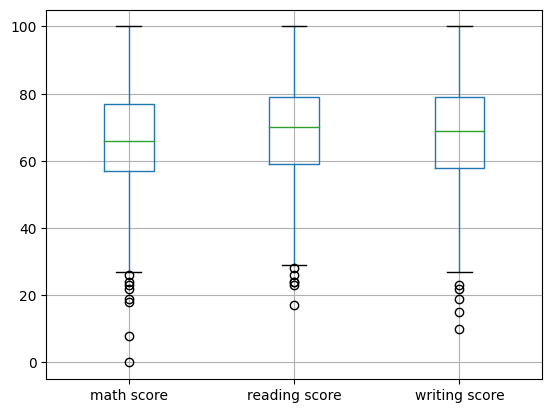

In [7]:
# Create box plots for numeric columns
numeric_columns = ['math score', 'reading score', 'writing score']
df[numeric_columns].boxplot()

# Display the box plots
plt.show()


#### Showing a short Summary and Data types

In [14]:
# Summary of the data
summary = df.describe()
# Data types of each column
data_types = df.dtypes

# Displaying the summary and data types
print(summary)
print(data_types)

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


## Task-4 : Perform data visualization: 
- Create a bar plot to show the distribution of male and female students in the dataset. 
- Create a histogram to show the distribution of the scores in math, reading, and writing. 
- Create a bar plot to show the average scores in math, reading, and writing for each gender. 
- Create a scatter plot to show the relationship between math, reading, and writing scores.


#### Creating a bar plot to show the distribution of male and female students 

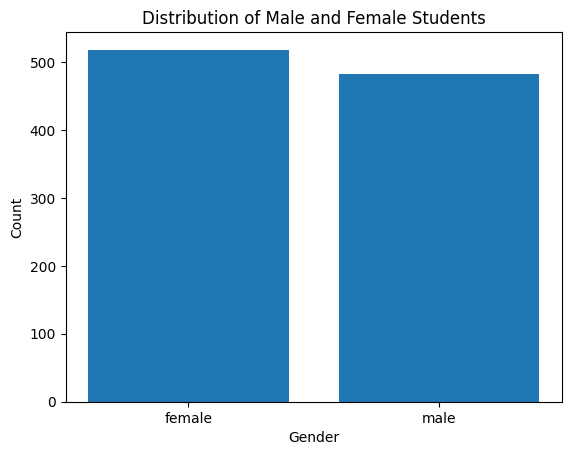

In [15]:
gender_counts = df['gender'].value_counts()

# Create a bar plot
plt.bar(gender_counts.index, gender_counts.values)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Male and Female Students')

# Display the plot
plt.show()

#### Creating a histogram to show the distribution of the scores in math, reading, and writing. 

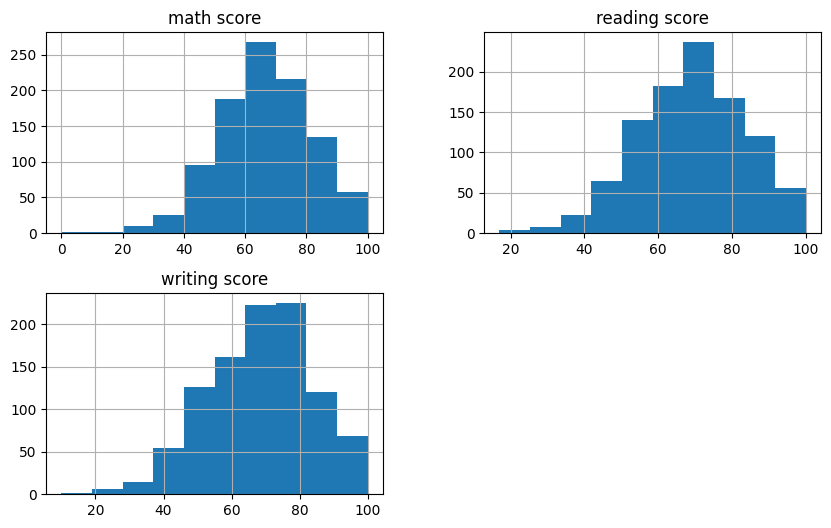

In [25]:
# Select the columns
score_columns = ['math score', 'reading score', 'writing score']

# Create a histogram
df[score_columns].hist(bins=10, figsize=(10, 6))

# Set labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')

# Display the plot
plt.show()

#### Creating a bar plot to show the average scores in math, reading, and writing for each gender. 

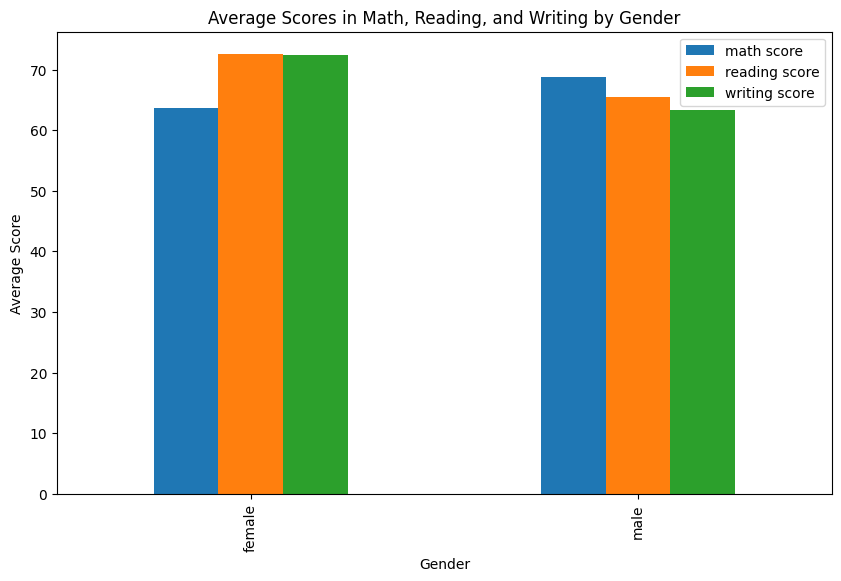

In [26]:
# Calculate average scores for each gender
average_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

# Create a bar plot
average_scores.plot(kind='bar', figsize=(10, 6))

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title('Average Scores in Math, Reading, and Writing by Gender')

# Display the plot
plt.show()

#### Creating a scatter plot to show the relationship between math, reading, and writing scores.

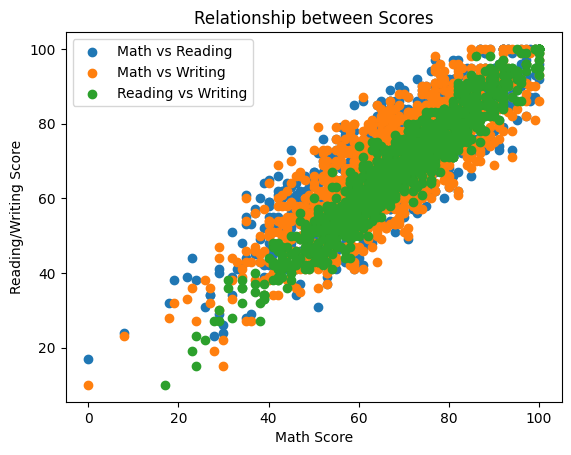

In [24]:
# Select the columns
score_columns = ['math score', 'reading score', 'writing score']

# Create a scatter plot
plt.scatter(df['math score'], df['reading score'], label='Math vs Reading')
plt.scatter(df['math score'], df['writing score'], label='Math vs Writing')
plt.scatter(df['reading score'], df['writing score'], label='Reading vs Writing')

# Set labels and title
plt.xlabel('Math Score')
plt.ylabel('Reading/Writing Score')
plt.title('Relationship between Scores')

# Add legend
plt.legend()

# Display the plot
plt.show()

## Task-5 : Perform basic statistical analysis: 
- Calculate mean, median, and mode for math, reading, and writing scores. 
- Calculate the standard deviation for math, reading, and writing scores.
- Test if there's a significant difference between male and female students' performance in math, reading, and writing using an appropriate statistical test (e.g., t-test). 


#### Calculating mean, median, and mode for math, reading, and writing scores. 

In [21]:
# Select the columns
score_columns = ['math score', 'reading score', 'writing score']

# Calculate mean
mean_scores = df[score_columns].mean()

# Calculate median
median_scores = df[score_columns].median()

# Calculate mode
mode_scores = df[score_columns].mode().iloc[0]

# Display the mean, median, and mode scores
summary = pd.DataFrame({'Mean': mean_scores, 'Median': median_scores, 'Mode': mode_scores})
print(summary)

                 Mean  Median  Mode
math score     66.089    66.0    65
reading score  69.169    70.0    72
writing score  68.054    69.0    74


#### Calculating the standard deviation for math, reading, and writing scores.

In [22]:
# Select the columns
score_columns = ['math score', 'reading score', 'writing score']

# Calculate the standard deviation
std_scores = df[score_columns].std()

# Display the standard deviation scores
print(std_scores)

math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64


#### Testing if there's a significant difference between male and female students' performance in math, reading, and writing using an appropriate statistical test (e.g., t-test).

In [27]:
# Select the columns of interest and split them by gender
math_scores_male = df[df['gender'] == 'male']['math score']
math_scores_female = df[df['gender'] == 'female']['math score']

reading_scores_male = df[df['gender'] == 'male']['reading score']
reading_scores_female = df[df['gender'] == 'female']['reading score']

writing_scores_male = df[df['gender'] == 'male']['writing score']
writing_scores_female = df[df['gender'] == 'female']['writing score']

# Perform independent samples t-test for each subject
t_statistic_math, p_value_math = stats.ttest_ind(math_scores_male, math_scores_female)
t_statistic_reading, p_value_reading = stats.ttest_ind(reading_scores_male, reading_scores_female)
t_statistic_writing, p_value_writing = stats.ttest_ind(writing_scores_male, writing_scores_female)

# Display the t-statistic and p-value for each subject
print("Math: t-statistic = {:.4f}, p-value = {:.4f}".format(t_statistic_math, p_value_math))
print("Reading: t-statistic = {:.4f}, p-value = {:.4f}".format(t_statistic_reading, p_value_reading))
print("Writing: t-statistic = {:.4f}, p-value = {:.4f}".format(t_statistic_writing, p_value_writing))

Math: t-statistic = 5.3832, p-value = 0.0000
Reading: t-statistic = -7.9593, p-value = 0.0000
Writing: t-statistic = -9.9796, p-value = 0.0000


|<pre>                                                           </pre>|
|----------------------------------------------------------------------|
|             ***Analysis and Visualization Report***                  |         
|                                                                      |
|                  ***Authors***                                       |
|    <font size="5"><i><b>Fahad Hossain</b></i></font>                 |
|                                                                      |
|----------------------------------------------------------------------|
